In [1]:
import numpy as np
import folium
from toll_detect.road_network import RoadNetwork
from toll_detect.road_node import RoadNode
from toll_detect.utils import *
from toll_detect.poi_tolls import *
from toll_detect.node_set import NodeSet
import pandas as pd
import geopy
%load_ext autoreload
%autoreload 2

In [2]:
import json
with open('config.json', 'r') as f:
    config = json.loads(f.read())

In [3]:
rn_path = config['roadnetwork_path']
poi_toll_path = config['poi_toll_path']
rn = RoadNetwork(rn_path, check_node_consistency=True)
toll = POITolls(poi_toll_path)

In [4]:
intersection_set= rn.get_highway_intersections_coords()
len(rn.nodes), len(intersection_set)

(223115, 9856)

In [5]:
len(set(rn.df_road_net['start_id']) | set(rn.df_road_net['end_id']))

223115

In [6]:
def plot_points(points):
    """绘制点到地图上"""
    m = folium.Map(location=points[0], zoom_start=12)
    for p in points:
        folium.Marker(p).add_to(m)
    return m

In [31]:
plot_points(intersection_set.coords(False)[:200])

In [8]:
neareaset_node_set, distances_to_neareast_node = toll.nearest_nodes(intersection_set, k=1, return_distance=True)

(array([954.,  37.,  12.,  16.,   3.,   0.,   2.,   2.,   2.,   2.]),
 array([   20.80042512,  1905.4256316 ,  3790.05083809,  5674.67604458,
         7559.30125106,  9443.92645755, 11328.55166404, 13213.17687052,
        15097.80207701, 16982.4272835 , 18867.05248998]),
 <a list of 10 Patch objects>)

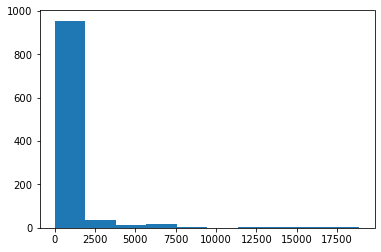

In [9]:
import matplotlib.pyplot as plt
plt.hist(distances_to_neareast_node)

In [10]:
np.mean(distances_to_neareast_node)

884.6483554271089

In [11]:
np.percentile(distances_to_neareast_node, [5, 50, 80,95])

array([ 120.0374019 ,  517.46814996,  836.09377959, 3308.70797026])

In [18]:
plot_toll_with_neareast_intersection_node(neareaset_node_set, toll, 
                            irange=np.arange(50), show_distances=True, show_connect_line=False)

In [45]:
rn.df_road_net['highway'].unique()

array(['trunk', 'secondary', 'motorway', 'unclassified', 'residential',
       'tertiary', 'service', 'primary', 'trunk_link', 'primary_link',
       'motorway_link', 'tertiary_link', 'road', 'living_street',
       'secondary_link'], dtype=object)

In [60]:
intersection_set.get_type_distribution_df()

,Ratio
trunk-trunk_link,16.203328
tertiary-trunk,13.403003
primary-trunk,5.113636
residential-trunk,14.163961
road-trunk,0.507305
...,...
motorway_link-primary-secondary_link-trunk,0.010146
motorway-service-trunk,0.010146
motorway-motorway_link-service-unclassified,0.010146
motorway_link-secondary_link-trunk,0.010146


In [61]:
neareaset_node_set.get_type_distribution_df()

,Ratio
motorway-primary,0.194175
motorway-motorway_link,67.572816
secondary-trunk,2.621359
trunk-unclassified,1.747573
motorway_link-trunk,4.077670
tertiary-trunk,2.621359
residential-trunk,2.815534
primary_link-trunk,0.776699
primary-trunk,1.456311
trunk-trunk_link,4.757282


## 测试删去'_link'符号的路网

In [20]:
rn_no_link = RoadNetwork(rn_path, check_node_consistency=False, change_value=True)

In [21]:
intersection_set_no_link= rn_no_link.get_highway_intersections_coords()
len(rn_no_link.nodes), len(intersection_set_no_link)

(223115, 8603)

In [22]:
neareaset_node_set_no_link, distances_to_neareast_node_no_link = toll.nearest_nodes(intersection_set_no_link
                                                                            , k=1, return_distance=True)

In [23]:
np.mean(distances_to_neareast_node_no_link)

1007.256269361156

In [24]:
np.percentile(distances_to_neareast_node_no_link, [5, 50, 80,95])

array([ 158.11584435,  599.56649897,  974.27582713, 3494.8759799 ])

In [28]:
df_intersection_set_no_link = intersection_set_no_link.get_type_distribution_df()
df_intersection_set_no_link

,Ratio
tertiary+trunk,20.899686
motorway+secondary,4.172963
secondary+trunk,16.505870
service+trunk,5.579449
motorway+primary,4.626293
...,...
living_street+secondary+trunk,0.011624
motorway+secondary+service,0.011624
motorway+primary+secondary+trunk,0.011624
motorway+service+trunk,0.011624


In [71]:
neareaset_node_set_no_link.get_type_distribution_df()

,Ratio
motorway+primary,22.621359
secondary+trunk,7.087379
motorway+secondary+tertiary,0.776699
motorway+secondary,21.165049
motorway+primary+secondary,1.262136
tertiary+trunk,5.922330
primary+trunk,4.757282
motorway+tertiary,11.262136
residential+trunk,5.533981
trunk+unclassified,2.912621


In [25]:
large_dis_range = np.arange(len(distances_to_neareast_node_no_link))[np.array(distances_to_neareast_node_no_link) > 3000]

In [26]:
plot_toll_with_neareast_intersection_node(neareaset_node_set_no_link, 
                                          toll, irange=large_dis_range, show_distances=True, show_connect_line=True)

In [33]:
small_dis_range = np.arange(len(distances_to_neareast_node_no_link))[np.array(distances_to_neareast_node_no_link) < 900]

In [34]:
len(small_dis_range)

805

In [75]:
small_set = neareaset_node_set_no_link.sub_set(small_dis_range)

In [78]:
df_small_set_ratio = small_set.get_type_distribution_df()
df_small_set_ratio

,Ratio
motorway+primary,24.472050
secondary+trunk,6.583851
motorway+secondary+tertiary,0.745342
motorway+primary+secondary,1.614907
motorway+secondary,22.981366
motorway+tertiary,11.552795
tertiary+trunk,3.478261
primary+trunk,4.844720
residential+trunk,3.850932
service+trunk,2.236025


In [82]:
from toll_detect.utils import count_coverage_ratio
count_coverage_ratio(df_small_set_ratio, ['primary','secondary', 'tertiary'])

['primary', 'secondary', 'tertiary'] will take Ratio    84.720497
Name: motorway+primary, dtype: float64 percent.


In [29]:

count_coverage_ratio(df_intersection_set_no_link, ['primary','secondary', 'tertiary'])

['primary', 'secondary', 'tertiary'] will take Ratio    66.314076
Name: tertiary+trunk, dtype: float64 percent.
